In [1]:
#import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

In [2]:
ImagePATH = f"Mainimages/"

In [3]:
ImagePATH

'Mainimages/'

In [4]:

categories = glob(ImagePATH+"*")

In [5]:
print(categories)

['Mainimages/68', 'Mainimages/22', 'Mainimages/70', 'Mainimages/66', 'Mainimages/18', 'Mainimages/31', 'Mainimages/65', 'Mainimages/8', 'Mainimages/28', 'Mainimages/36', 'Mainimages/17', 'Mainimages/25', 'Mainimages/62', 'Mainimages/86', 'Mainimages/27', 'Mainimages/50', 'Mainimages/52', 'Mainimages/78', 'Mainimages/6', 'Mainimages/87', 'Mainimages/83', 'Mainimages/82', 'Mainimages/21', 'Mainimages/12', 'Mainimages/26', 'Mainimages/55', 'Mainimages/73', 'Mainimages/77', 'Mainimages/90', 'Mainimages/71', 'Mainimages/45', 'Mainimages/7', 'Mainimages/63', 'Mainimages/67', 'Mainimages/20', 'Mainimages/33', 'Mainimages/79', 'Mainimages/35', 'Mainimages/10', 'Mainimages/37', 'Mainimages/47', 'Mainimages/75', 'Mainimages/89', 'Mainimages/64', 'Mainimages/32', 'Mainimages/13', 'Mainimages/3', 'Mainimages/60', 'Mainimages/72', 'Mainimages/76', 'Mainimages/0', 'Mainimages/42', 'Mainimages/11', 'Mainimages/84', 'Mainimages/41', 'Mainimages/40', 'Mainimages/91', 'Mainimages/53', 'Mainimages/23', '

In [6]:
filedf = pd.DataFrame()
for cat in categories:
    files = glob(cat+"/*")
    tempdf = pd.DataFrame({'filepath':files,'category':cat.split("/")[-1]})
    filedf = pd.concat([filedf,tempdf])

In [7]:

filedf.head()

,filepath,category
0,Mainimages/68/baf64e8767645901.jpg,68
1,Mainimages/68/a3cb1c941ca6e367.jpg,68
2,Mainimages/68/d8cbc33026dfb1e0.jpg,68
3,Mainimages/68/941f693469b4b3a5.jpg,68
4,Mainimages/68/95b561481a8f6b7a.jpg,68


In [8]:

gby_cnt = filedf.groupby("category").aggregate('count').rename(columns = {'filepath':'cnt'}).reset_index().sort_values(by='cnt',ascending=False)

In [9]:
#px.bar(gby_cnt,x = 'category',y = 'cnt',color = 'category',title = 'Counts from Each Category')

In [10]:
!mkdir outputs4

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'


In [11]:

gby_cnt.to_csv(f"outputs4/category_counts.csv",index=None)

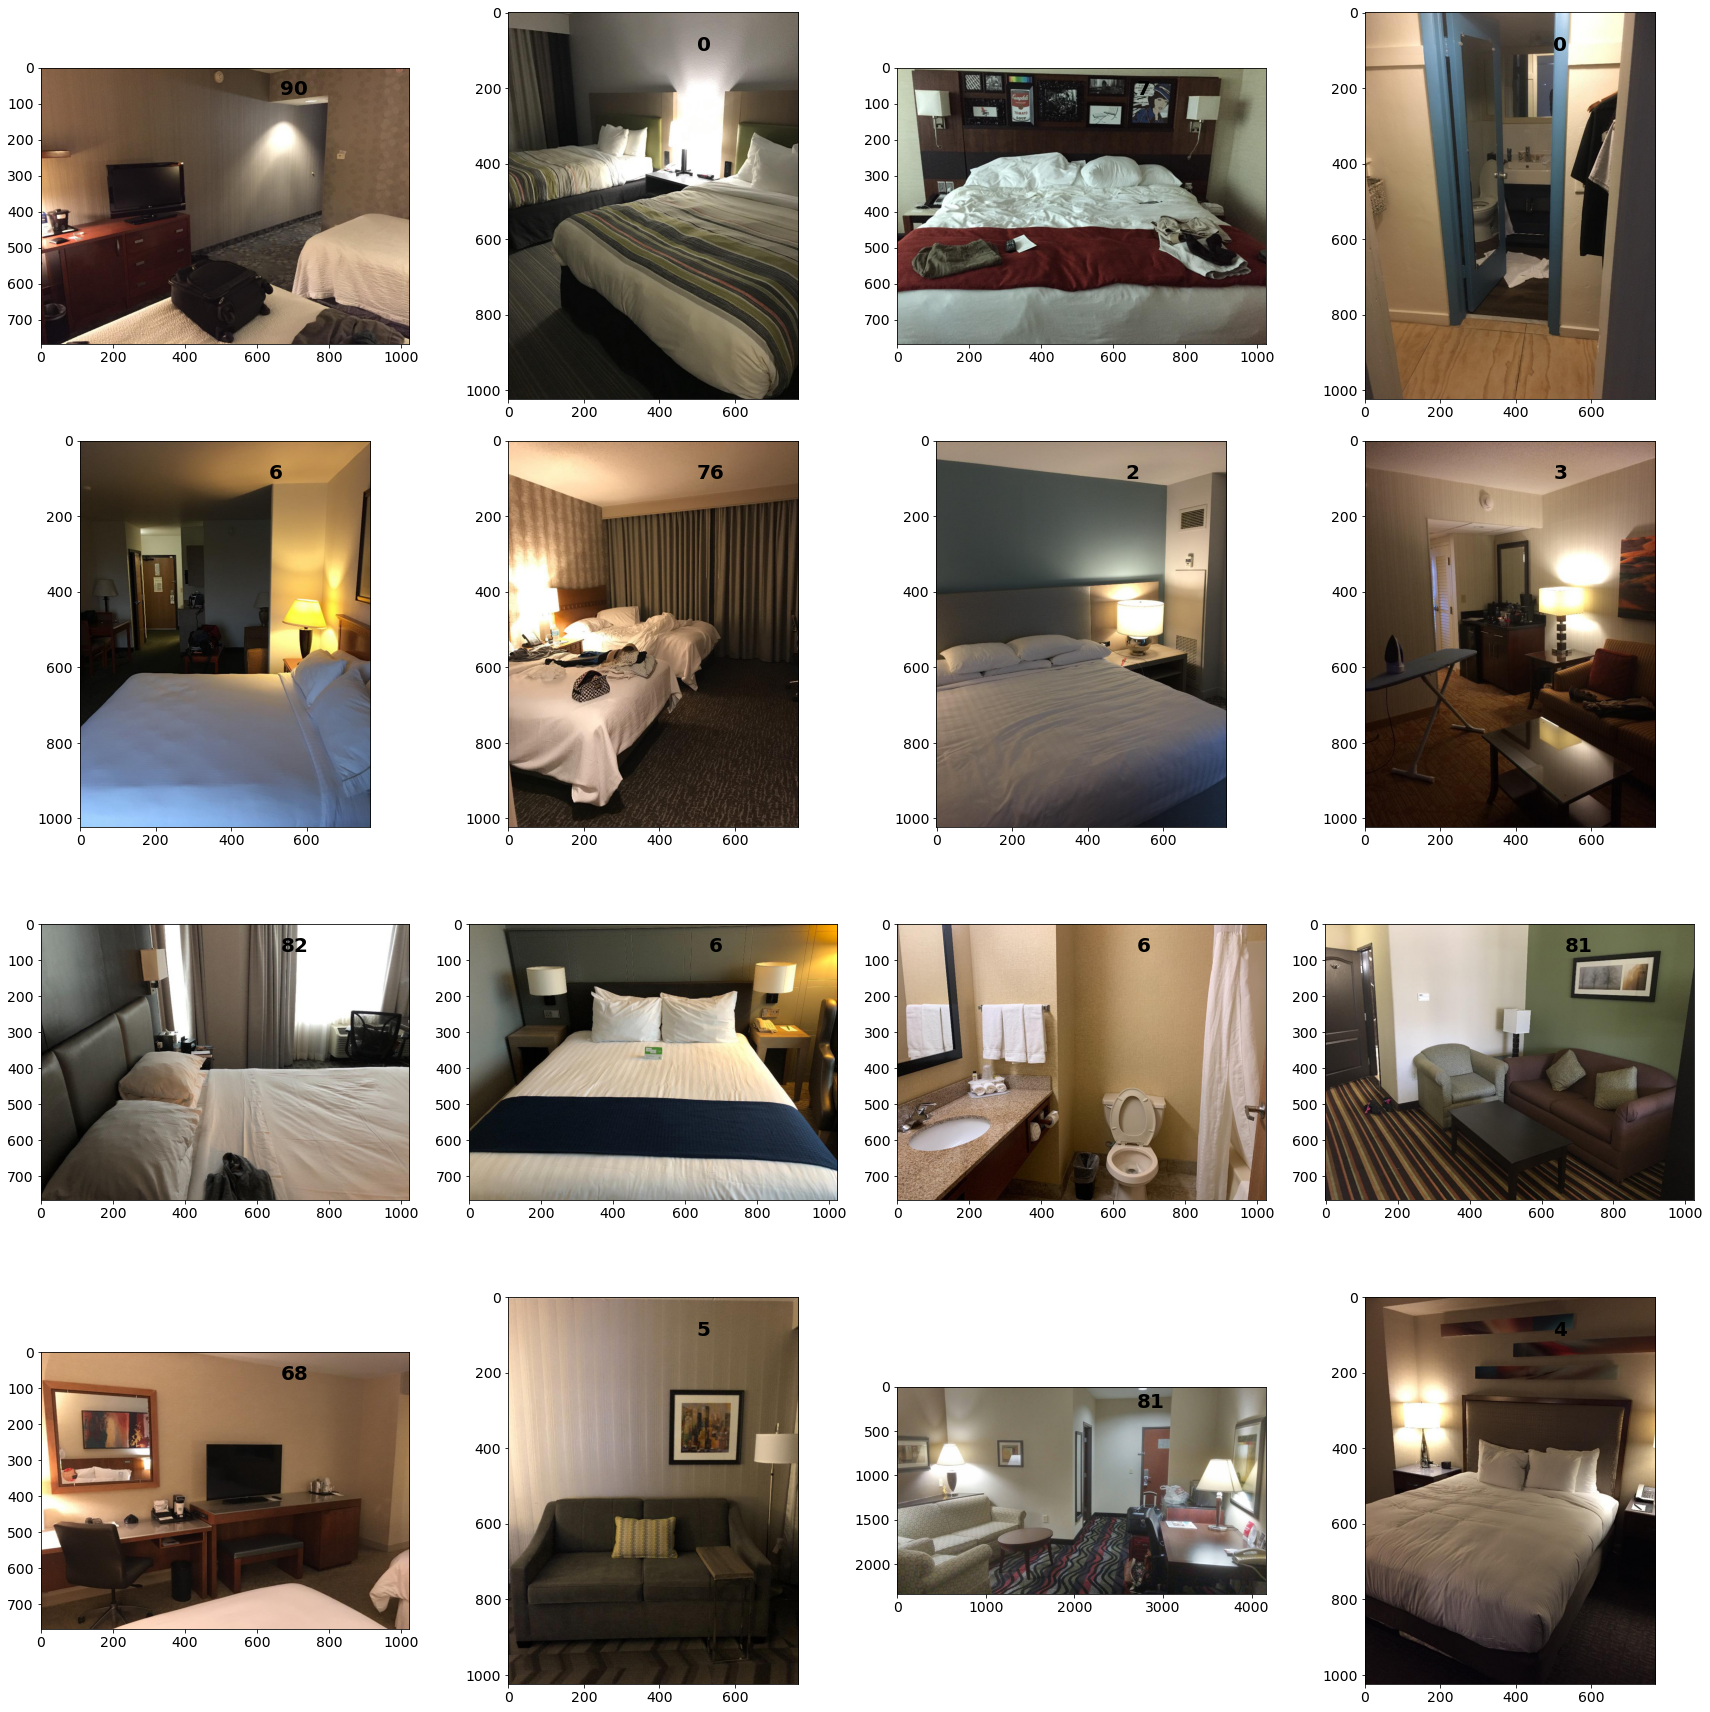

In [12]:
plt.figure(figsize=(24, 24))

for i in range(16):
    path = filedf.sample(1)['filepath'].values[0]
    category = path.split("/")[1]
    ex_img = Image.open(path)
    ax = plt.subplot(4, 4, i + 1)
    ax.annotate(category, xy=(0.65, 0.9), xycoords="axes fraction",weight='bold',size=20)
    ax.imshow(ex_img)

plt.tight_layout()

In [13]:
focus_cats = gby_cnt[gby_cnt['cnt'] <=20000]['category'].values

In [14]:
focus_cats = gby_cnt[gby_cnt['cnt'] <=20000]['category'].values

In [15]:
filedf  = filedf[filedf['category'].isin(focus_cats)]

In [16]:

filedf.category.value_counts()

6     8157
5     6328
3     5398
4     4771
2     3889
      ... 
10      12
16       8
56       8
13       8
18       8
Name: category, Length: 87, dtype: int64

In [17]:
'''
X_train, X_test, _, _ = train_test_split(
        filedf, filedf['category'],stratify=filedf['category'], test_size=0.4)

X_test, X_val, _, _ = train_test_split(
        X_test, X_test['category'], stratify=X_test['category'], test_size=0.5)
'''
X_train, X_test, y_train, y_test =train_test_split(
        filedf, filedf['category'],stratify=filedf['category'], test_size=0.33)



In [18]:
len(pd.unique(X_train['category']))

87

In [19]:
len(pd.unique(X_test['category']))

87

In [20]:
y_train.iloc[0]

'86'

In [21]:
'''
X_train['type'] = 'train'
X_val['type'] = 'val'
X_test['type'] = 'test'

'''

"\nX_train['type'] = 'train'\nX_val['type'] = 'val'\nX_test['type'] = 'test'\n\n"

In [36]:
#fulldf = pd.concat([X_train,X_test,X_val])


In [37]:
#fulldf.type.value_counts()

train    46239
val      15413
test     15413
Name: type, dtype: int64

In [22]:
#ulldf.head()


NameError: name 'fulldf' is not defined

In [39]:

#fulldf.category.value_counts()[0]/len(fulldf)

0.10584571465645884

In [40]:

!mkdir data
!rm -rf data/
!rm -rf data/train
!rm -rf data/test
!rm -rf data/val
!mkdir data/
!mkdir data/train
!mkdir data/test
!mkdir data/val


In [41]:
fulldf.category.unique()

array(['6', '87', '89', '50', '34', '78', '84', '68', '5', '9', '2', '63',
       '25', '40', '4', '90', '76', '81', '3', '72', '85', '64', '8',
       '73', '62', '77', '1', '45', '66', '75', '39', '80', '49', '82',
       '57', '7', '55', '83', '86', '88', '70', '23', '29', '38', '11',
       '22', '79', '74', '52', '71', '69', '51', '59', '53', '47', '44',
       '61', '67', '27', '54', '35', '65', '46', '48', '42', '37', '41',
       '30', '60', '33', '91', '36', '32', '24', '17'], dtype=object)

In [32]:

for cat in X_train.category.unique():
    os.system(f'mkdir -p ./newimages/train/{cat}') 
    os.system(f'mkdir -p ./newimages/test/{cat}') 
    #os.system(f"mkdir data/val/'{cat}'")


In [33]:
f'mkdir newimages/train/{cat}'

'mkdir newimages/train/13'

In [34]:
os.system(f'mkdir ./newimages/train/{cat}') 

256

In [46]:
fulldf.head()


,filepath,category,type
5685,main_images/6/c3c73e3898cf3690.jpg,6,train
2541,main_images/87/e1e0e23f1b8e070f.jpg,87,train
2042,main_images/89/aa7ad15e6a35948a.jpg,89,train
3703,main_images/6/c99326ca7b518bb1.jpg,6,train
487,main_images/50/cdcc6dd8146d1639.jpg,50,train


In [35]:

for i,row in X_train.iterrows():
    # Boat category
    cat = row['category']
    #print(cat)
    # section is train,val or test
    section = 'train'
    # input filepath to copy
    ipath = row['filepath']
    
    #print(ipath)
    # output filepath to paste
    opath = ipath.replace(f"Mainimages/",f"newimages/{section}/")
    #print(opath)
    # running the cp command
    os.system(f"cp '{ipath}' '{opath}'")

In [30]:
pwd

'/home/ubuntu/Capstone-3/data'

In [36]:

for i,row in X_test.iterrows():
    # Boat category
    cat = row['category']
    #print(cat)
    # section is train,val or test
    section = 'test'
    # input filepath to copy
    ipath = row['filepath']
    
    #print(ipath)
    # output filepath to paste
    opath = ipath.replace(f"Mainimages/",f"newimages/{section}/")
    #print(opath)
    # running the cp command
    os.system(f"cp '{ipath}' '{opath}'")